# Preparação dos dados

In [ ]:
# Lendo drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# bibliotecas necessárias
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics  import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

## Lendo dados 

In [ ]:
# dados em pasta 
pasta = '/content/drive/My Drive/DEV_PESQUISA/novos_dados/'

In [ ]:
# lendo dados base de dados IDEB 20117 escolas Brasileiras
dados17 = pd.read_csv('/content/drive/My Drive/DEV_PESQUISA/TS_ESCOLA2017.csv', encoding="ISO-8859-1")

In [ ]:
dados19.head()

,Sigla da UF,CÃ³digo do MunicÃ­pio,Nome do MunicÃ­pio,CÃ³digo da Escola,Nome da Escola,Rede,6Âº a 9Âº ano,6Âº,7Âº,8Âº,...,IDEB\n2017\n(N x P),IDEB\n2019\n(N x P),2007,2009,2011,2013,2015,2017,2019,2021
0,RO,1100015.0,Alta Floresta D'Oeste,11024666.0,EMEIEF BOA ESPERANCA,Municipal,-,-,-,-,...,4.1,-,-,-,4.3,4.6,4.9,5.2,5.4,5.7
1,RO,1100015.0,Alta Floresta D'Oeste,11024682.0,EEEF EURIDICE LOPES PEDROSO,Estadual,81.0,75.6,86.2,84.5,...,-,-,3.9,4.1,4.3,4.7,5.1,5.4,5.6,5.8
2,RO,1100015.0,Alta Floresta D'Oeste,11024828.0,EMEIEF IZIDORO STEDILE,Municipal,-,-,-,-,...,4.8,4.2,-,-,2.8,3.1,3.4,3.7,3.9,4.2
3,RO,1100015.0,Alta Floresta D'Oeste,11024917.0,EMEIEF JOSE BASILIO DA GAMA,Municipal,-,-,-,-,...,-,-,-,-,3.6,3.9,4.2,4.5,4.7,5.0
4,RO,1100015.0,Alta Floresta D'Oeste,11024968.0,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,78.1,72.0,79.1,94.0,...,5.3,-,3.5,3.7,3.9,4.3,4.7,5.0,5.2,5.5


In [ ]:
# lendo dados base de dados IDEB 2019 escolas Brasileiras
dados = pd.read_csv(pasta + 'TS_ESCOLA.csv', encoding="ISO-8859-1")

In [ ]:
dados.head()


In [ ]:
df_sobre_questoes = pd.read_excel('/content/drive/My Drive/DEV_PESQUISA/Consulta-descricao-questoes.xlsx', sheet_name = 'questoes-esc')

In [ ]:
df_sobre_questoes.head()

,Código,Cod,Descrição (texto da pergunta)
0,1.0,ID_SAEB,Ano de aplicação do Saeb
1,2.0,ID_REGIAO,Código da Região
2,3.0,ID_UF,Código da Unidade da Federação
3,4.0,ID_MUNICIPIO,Código do Município
4,5.0,ID_AREA,Área


In [ ]:
# lendo dataframe com informacoes das questoes 
descricao_questoes_respostas = pd.read_excel('/content/drive/My Drive/DEV_PESQUISA/dicionario_questoes_respostas-esc2.xlsx')
descricao_questoes_respostas.head()

,Questaao,Descrição,A,B,C,D,E,F,G,H,...,R,S,T,O.1,W,X,Y,Z,AA,AB
0,ID_SAEB,Ano de aplicação do Saeb,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_REGIAO,Código da Região,1 - Norte,2 - Nordeste,3 - Sudeste,4 - Sul,5 - Centro-Oeste,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_UF,Código da Unidade da Federação,11-RO,12-AC,13-AM,14-RR,15-PA,16-AP,17-TO,21-MA,...,32-ES,33-RJ,35-SP,41-PR,42-SC,43-RS,50-MS,51-MT,52-GO,53-DF
3,ID_MUNICIPIO1,Código do Município,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_AREA,Área,1 - Capital,2 - Interior,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Funções para coleta e filtro de informações

## Criando função para coleta de informações sobre questões 

In [ ]:
# funcao para obter texto da Questaao
def pegar_questao(questao):
  try :
    informacoes = descricao_questoes_respostas[descricao_questoes_respostas['Questaao'] == questao]
  except NameError as e:
    raise NameError('Dataframe não encontrado')
  return informacoes

## Função para pegar nome dos estados

In [ ]:
# Posição de instância de IF_UF e REGION em dicionário de dados (pois está como linha e não coluna)
INSTANCE_STATE_POSITION = 2
INSTANCE_REGION_POSITION = 1

def get_uf_name(uf_id):
  uf_id = str(uf_id)
  result_instances = list(descricao_questoes_respostas.iloc[INSTANCE_STATE_POSITION])[2:]
  return list(filter(lambda it: uf_id == it.split('-')[0], result_instances))[0]

def get_region_name(region_id):
  region_id = str(region_id)
  result_instances = list(descricao_questoes_respostas.iloc[INSTANCE_REGION_POSITION])[1:7]
  return list(filter(lambda it: region_id == it.split(' - ')[0], result_instances))[0]

## Funçao para calcular valores estatísticos

In [ ]:
def get_statistics(data, column, lvl_economic=None):

  if lvl_economic:
    result = dict()
    levels = data['NIVEL_SOCIO_ECONOMICO'].copy()
    levels.dropna(inplace=True)
    levels = levels.unique()
    for level in levels:
      data_field = data[data['NIVEL_SOCIO_ECONOMICO']==level]        
      data_field = data_field[column].copy()
      data_field.dropna(inplace=True)
      result[level] = {
        'mean': data_field.mean(),
        'median': data_field.median(),
        'mode': list(data_field.mode()),
        'var': data_field.var(),
        'std': data_field.std()
      }
    return result

  data_field = data[column].copy()
  data_field.dropna(inplace=True)

  return {
      'mean': data_field.mean(),
      'median': data_field.median(),
      'mode': list(data_field.mode()),
      'var': data_field.var(),
      'std': data_field.std()
  }

def get_statistics_by_state(data, state, column, lvl_economic=None):
  state_data = data[data['ID_UF'] == state]
  return get_statistics(state_data, column, lvl_economic=lvl_economic)

def get_statistics_by_region(data, region, column, lvl_economic=None):
  region_data = data[data['ID_REGIAO'] == region]
  return get_statistics(region_data, column, lvl_economic=lvl_economic)


# Plotando gráficos por estados

## MEDIA_5EF_LP

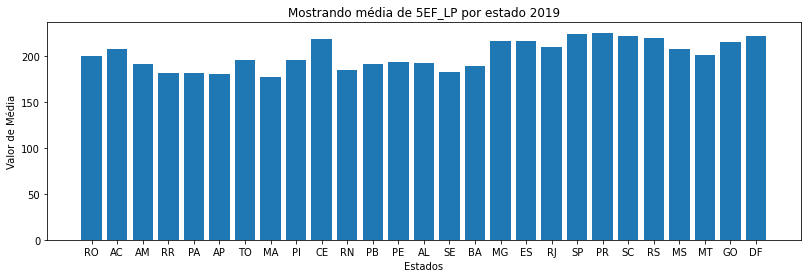

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_5EF_LP'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_LP por estado 2019')
plt.show()

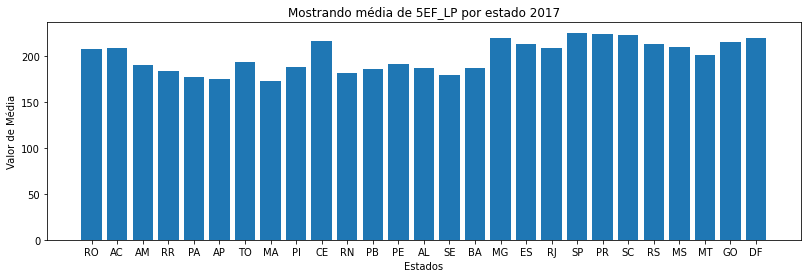

In [ ]:
states = list(map(get_uf_name, dados17['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_5EF_LP'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_LP por estado 2017')
plt.show()

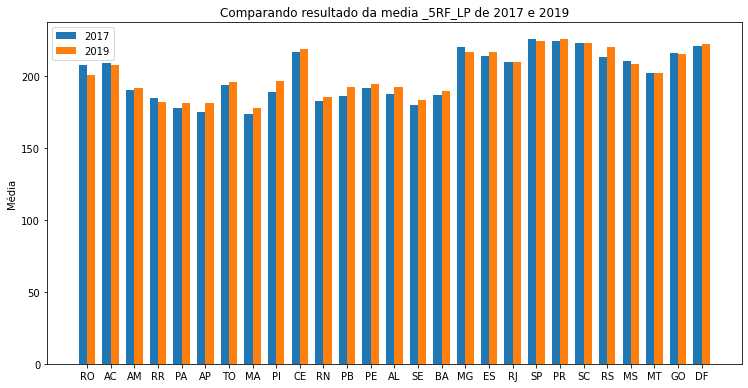

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states= list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_5EF_LP'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_5EF_LP'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media _5RF_LP de 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# Resultado da diferença entre 2019 2017
for state in range(len(states_names)):
  print(f'{states_names[state]}: {values19[state]} - {values17[state]} = {values19[state] - values17[state]}')

RO: 200.18388758782203 - 207.69051975051957 = -7.506632162697542
AC: 207.62711790393018 - 209.09382812499985 = -1.4667102210696612
AM: 191.7749671052629 - 190.19359890109905 = 1.5813682041638515
RR: 181.65108910891084 - 184.3635042735043 = -2.712415164593466
PA: 181.2451338306278 - 177.7520846788658 = 3.493049151761994
AP: 181.15862944162424 - 174.85651260504181 = 6.302116836582428
TO: 195.4182494004796 - 193.79213307240687 = 1.626116328072726
MA: 177.84494013303714 - 173.19756206002216 = 4.647378073014977
PI: 196.01029580152667 - 188.77769999999992 = 7.232595801526742
CE: 218.63063398140343 - 216.67921042395952 = 1.951423557443917
RN: 185.417313253012 - 182.32548698167795 = 3.0918262713340425
PB: 191.95020351526375 - 186.24748240813136 = 5.70272110713239
PE: 194.12671525247285 - 191.48730991337843 = 2.6394053390944237
AL: 192.19248044692765 - 187.35040525739322 = 4.842075189534427
SE: 183.02248803827754 - 179.43726315789482 = 3.585224880382725
BA: 189.33208702882536 - 186.732805668988

## MEDIA_5EF_MT

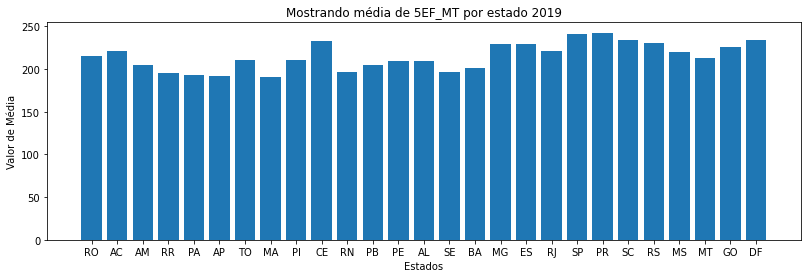

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_5EF_MT'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_MT por estado 2019')
plt.show()

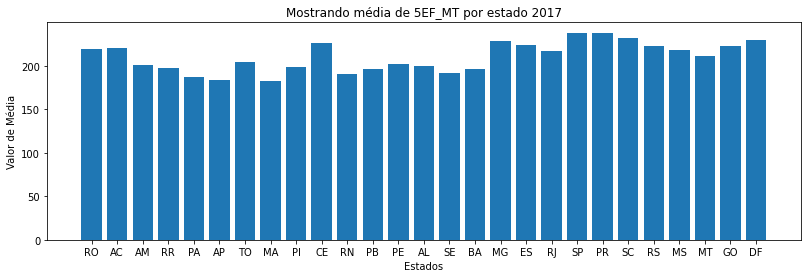

In [ ]:
states = list(map(get_uf_name, dados17['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_5EF_MT'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_MT por estado 2017')
plt.show()

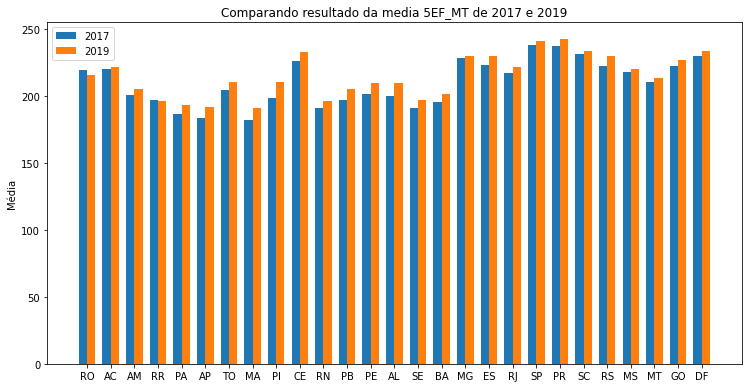

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states= list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_5EF_MT'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_5EF_MT'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media 5EF_MT de 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# Resultado da diferença entre 2019 2017
for state in range(len(states_names)):
  print(f'{states_names[state]}: {values19[state]} - {values17[state]} = {values19[state] - values17[state]}')

RO: 215.3249882903982 - 219.0297505197505 = -3.7047622293522977
AC: 221.74144104803477 - 220.41867187499997 = 1.3227691730348
AM: 204.9069627192983 - 200.620082417582 = 4.28688030171628
RR: 195.8332673267327 - 196.93051282051277 = -1.0972454937800649
PA: 193.20078104431744 - 186.62750986724052 = 6.5732711770769185
AP: 191.6660913705584 - 183.27764705882348 = 8.38844431173493
TO: 210.41589928057553 - 204.05434442270058 = 6.36155485787495
MA: 190.95645232815968 - 182.04703593923725 = 8.909416388922438
PI: 210.18292938931273 - 198.5688583333332 = 11.614071055979537
CE: 232.7961200338121 - 225.70402956048224 = 7.092090473329847
RN: 196.29997590361418 - 190.73756027000968 = 5.562415633604502
PB: 204.94652173913047 - 196.5709695074277 = 8.375552231702784
PE: 209.6128370640289 - 201.5430943214632 = 8.069742742565694
AL: 209.77621229050297 - 199.72886089813795 = 10.047351392365016
SE: 197.19496012759183 - 191.10155263157898 = 6.093407496012844
BA: 201.69273835920174 - 195.7789791016092 = 5.913

## MEDIA_9EF_LP

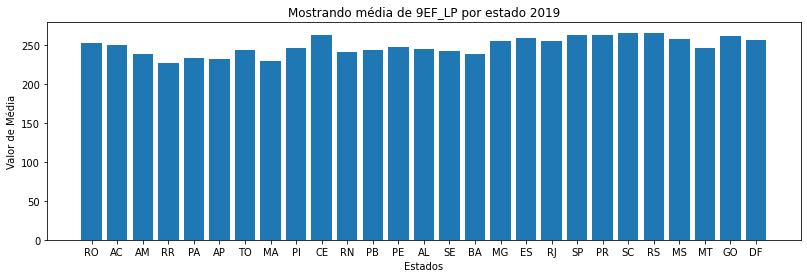

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_9EF_LP'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_LP por estado 2019')
plt.show()

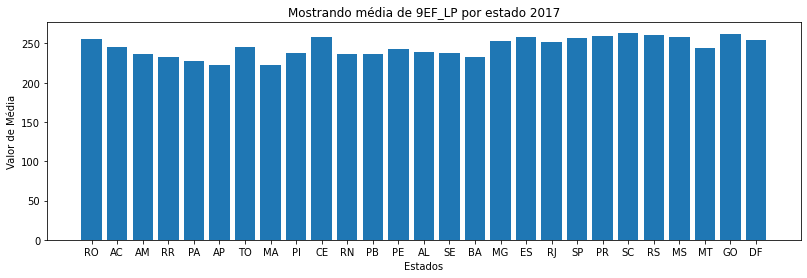

In [ ]:
states = list(map(get_uf_name, dados17['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_9EF_LP'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_LP por estado 2017')
plt.show()

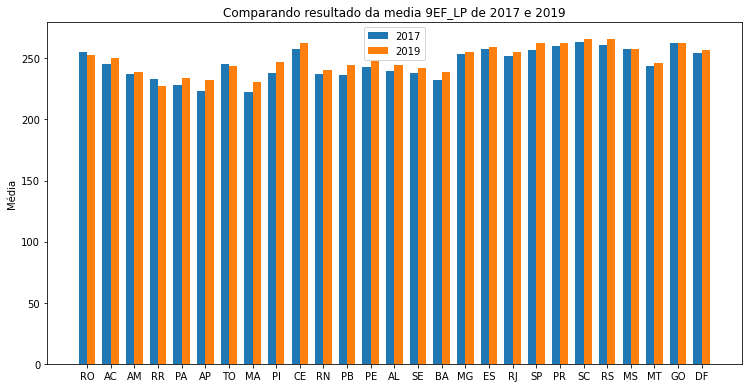

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states= list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_9EF_LP'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_9EF_LP'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media 9EF_LP de 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# Resultado da diferença entre 2019 2017
for state in range(len(states_names)):
  print(f'{states_names[state]}: {values19[state]} - {values17[state]} = {values19[state] - values17[state]}')

RO: 252.9652296819788 - 255.0585597826085 = -2.0933301006297143
AC: 249.96124031007744 - 245.77109826589592 = 4.190142044181528
AM: 238.7594788273617 - 236.95693057247257 = 1.8025482548891318
RR: 227.0816666666667 - 233.33592233009708 = -6.254255663430371
PA: 234.0878604963111 - 228.10323711340249 = 5.984623382908609
AP: 231.98330000000013 - 222.87267515923577 = 9.110624840764359
TO: 243.61895384615391 - 245.41594594594602 = -1.7969920997921065
MA: 230.2991291810843 - 222.62268732654962 = 7.676441854534687
PI: 246.61816949152563 - 237.9235523809525 = 8.694617110573148
CE: 262.59297216699827 - 257.6352591599645 = 4.95771300703376
RN: 240.75830227743273 - 236.95171503957826 = 3.8065872378544725
PB: 244.50337349397586 - 236.63330011074197 = 7.870073383233887
PE: 248.11356868764446 - 242.68821505376357 = 5.4253536338808885
AL: 244.69941406249993 - 239.2924169741699 = 5.40699708833003
SE: 242.30607235142136 - 238.0944054580898 = 4.211666893331568
BA: 238.7012472259207 - 232.53806980056993 =

## MEDIA_9EF_MT

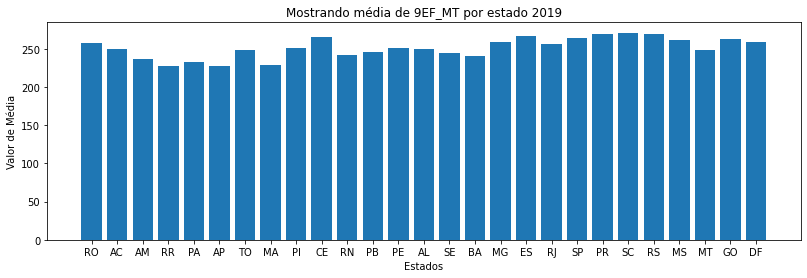

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_9EF_MT'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_MT por estado 2019')
plt.show()

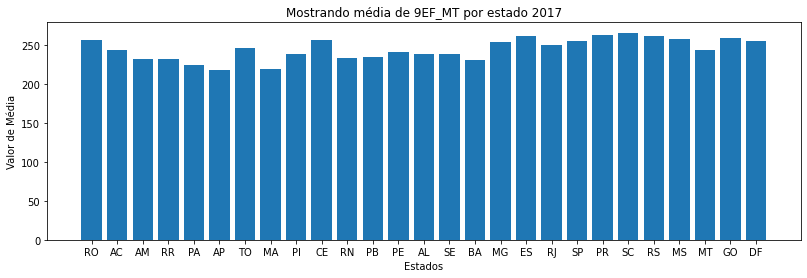

In [ ]:
states = list(map(get_uf_name, dados17['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_9EF_MT'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_MT por estado 2017')
plt.show()

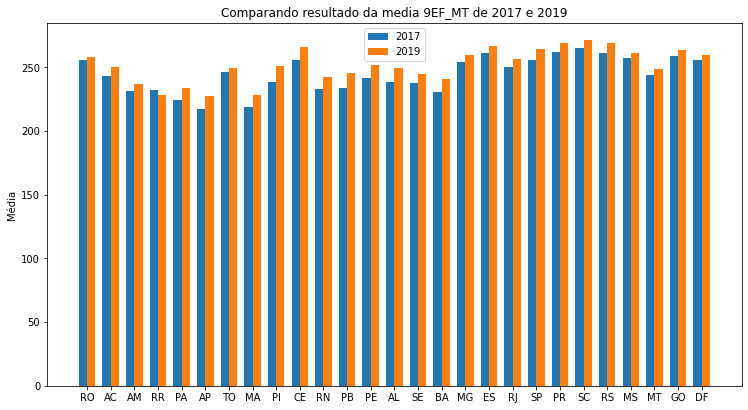

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states= list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'MEDIA_9EF_MT'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'MEDIA_9EF_MT'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.8))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media 9EF_MT de 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# Resultado da diferença entre 2019 2017
for state in range(len(states_names)):
  print(f'{states_names[state]}: {values19[state]} - {values17[state]} = {values19[state] - values17[state]}')

RO: 257.6713074204947 - 255.87361413043476 = 1.7976932900599536
AC: 250.30263565891468 - 243.27468208092498 = 7.027953577989706
AM: 236.99574918566782 - 231.59204628501868 = 5.403702900649137
RR: 228.22358974358963 - 232.35883495145634 = -4.135245207866717
PA: 233.43615694165018 - 224.5807731958761 = 8.855383745774077
AP: 227.38269999999997 - 217.4689808917198 = 9.913719108280162
TO: 249.09092307692296 - 246.26675675675693 = 2.8241663201660288
MA: 228.40204728950434 - 219.0179648473636 = 9.384082442140738
PI: 250.68648587570613 - 238.11170476190452 = 12.574781113801606
CE: 265.8946123260436 - 255.86478105451323 = 10.029831271530384
RN: 241.9808074534161 - 233.1843535620053 = 8.796453891410806
PB: 245.632623828648 - 233.87558139534892 = 11.757042433299091
PE: 251.84639293937067 - 241.26921146953384 = 10.57718146983683
AL: 249.71394531250007 - 238.27846863468636 = 11.43547667781371
SE: 244.52767441860462 - 237.80358674463935 = 6.724087673965272
BA: 240.46350643586382 - 230.82310185185233

# Plotando gráficos por região

## MEDIA_5EF_LP

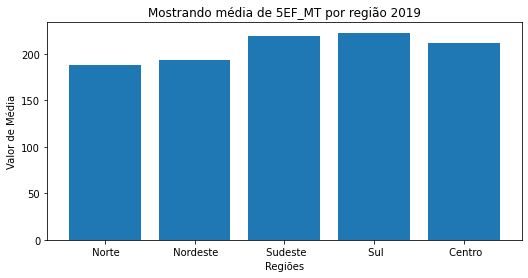

In [ ]:
regions = list(map(get_region_name, dados['ID_REGIAO'].unique()))
region_ids = [int(region.split('-')[0]) for region in regions]
region_names = [region.split('-')[1] for region in regions]

statistics19 = list(map(lambda region_id: get_statistics_by_region(dados, region_id, 'MEDIA_5EF_LP'), region_ids))

values = [result['mean'] for result in statistics19]

plt.figure(figsize=(8.5, 4)) 
plt.bar(region_names, values)
plt.xlabel('Regiões')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_MT por região 2019')
plt.show()

## MEDIA_5EF_MT

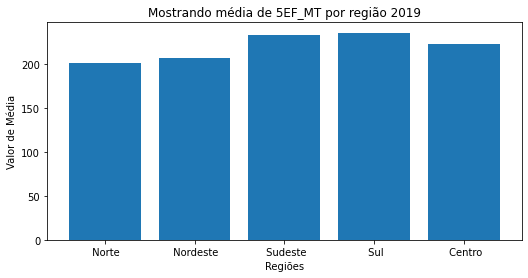

In [ ]:
regions = list(map(get_region_name, dados['ID_REGIAO'].unique()))
region_ids = [int(region.split('-')[0]) for region in regions]
region_names = [region.split('-')[1] for region in regions]

statistics19 = list(map(lambda region_id: get_statistics_by_region(dados, region_id, 'MEDIA_5EF_MT'), region_ids))

values = [result['mean'] for result in statistics19]

plt.figure(figsize=(8.5, 4)) 
plt.bar(region_names, values)
plt.xlabel('Regiões')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 5EF_MT por região 2019')
plt.show()

## MEDIA_9EF_LP

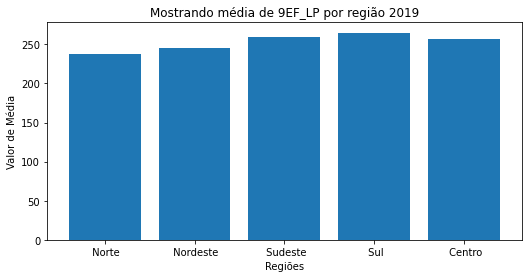

In [ ]:
regions = list(map(get_region_name, dados['ID_REGIAO'].unique()))
region_ids = [int(region.split('-')[0]) for region in regions]
region_names = [region.split('-')[1] for region in regions]

statistics19 = list(map(lambda region_id: get_statistics_by_region(dados, region_id, 'MEDIA_9EF_LP'), region_ids))

values = [result['mean'] for result in statistics19]

plt.figure(figsize=(8.5, 4)) 
plt.bar(region_names, values)
plt.xlabel('Regiões')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_LP por região 2019')
plt.show()

## MEDIA_9EF_MT

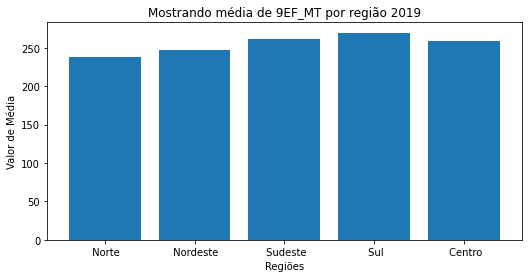

In [ ]:
regions = list(map(get_region_name, dados['ID_REGIAO'].unique()))
region_ids = [int(region.split('-')[0]) for region in regions]
region_names = [region.split('-')[1] for region in regions]

statistics19 = list(map(lambda region_id: get_statistics_by_region(dados, region_id, 'MEDIA_9EF_MT'), region_ids))

values = [result['mean'] for result in statistics19]

plt.figure(figsize=(8.5, 4)) 
plt.bar(region_names, values)
plt.xlabel('Regiões')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de 9EF_MT por região 2019')
plt.show()

# Plotando gráficos para formação docente por estado

## PC_FORMACAO_DOCENTE_INICIAL

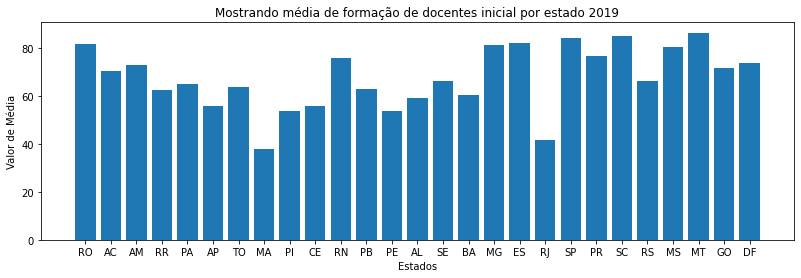

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'PC_FORMACAO_DOCENTE_INICIAL'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de formação de docentes inicial por estado 2019')
plt.show()

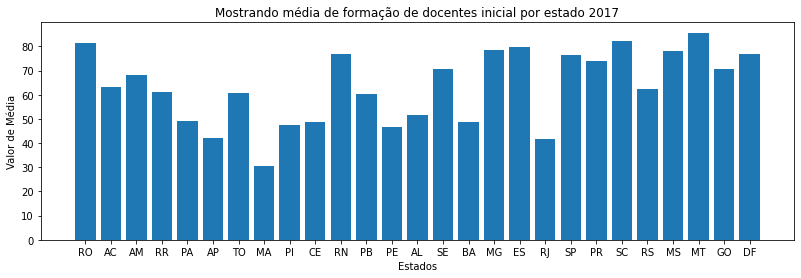

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'PC_FORMACAO_DOCENTE_INICIAL'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de formação de docentes inicial por estado 2017')
plt.show()

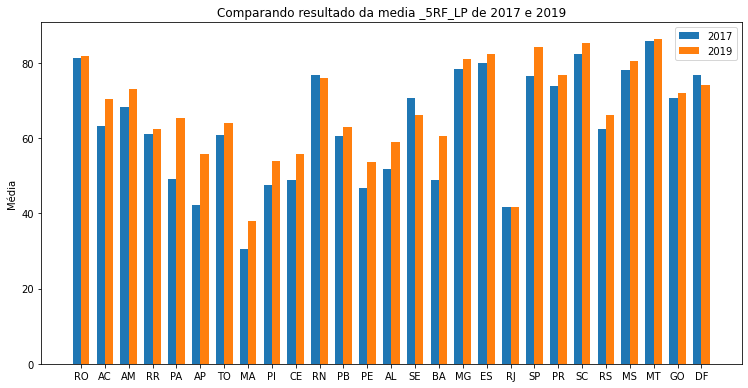

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'PC_FORMACAO_DOCENTE_INICIAL'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'PC_FORMACAO_DOCENTE_INICIAL'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media _5RF_LP de 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## PC_FORMACAO_DOCENTE_FINAL

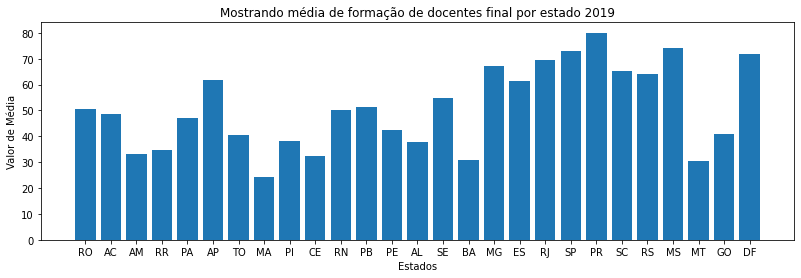

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'PC_FORMACAO_DOCENTE_FINAL'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de formação de docentes final por estado 2019')
plt.show()

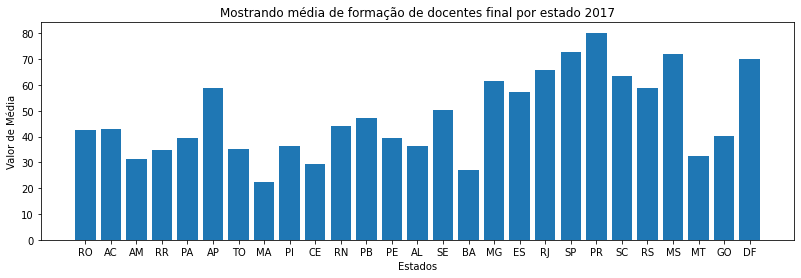

In [ ]:
states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'PC_FORMACAO_DOCENTE_FINAL'), states_ids))

values = [result['mean'] for result in statistics]

plt.figure(figsize=(13.5, 4)) 
plt.bar(states_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de formação de docentes final por estado 2017')
plt.show()

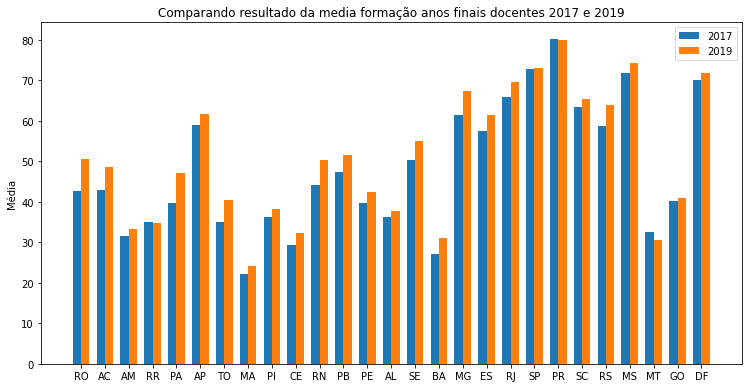

In [ ]:
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 

states = list(map(get_uf_name, dados['ID_UF'].unique()))
states_ids = [int(state.split('-')[0]) for state in states]
states_names = [state.split('-')[1] for state in states]

statistics17 = list(map(lambda state_id: get_statistics_by_state(dados17, state_id, 'PC_FORMACAO_DOCENTE_FINAL'), states_ids)) 
statistics19 = list(map(lambda state_id: get_statistics_by_state(dados, state_id, 'PC_FORMACAO_DOCENTE_FINAL'), states_ids))

values17 = [result['mean'] for result in statistics17]
values19 = [result['mean'] for result in statistics19]

x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, values17, width, label='2017')
rects2 = ax.bar(x + width/2, values19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparando resultado da media formação anos finais docentes 2017 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(states_names)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Plotando gráficos para nível sócio econômico por região

In [ ]:
regions = list(map(get_region_name, dados['ID_REGIAO'].unique()))
region_ids = [int(region.split('-')[0]) for region in regions]
region_names = [region.split('-')[1] for region in regions]

lvls = dados['NIVEL_SOCIO_ECONOMICO']
lvls.dropna(inplace=True)
lvls = lvls.unique()
lvls = list(lvls)
result = []
for level in lvls:
  result_lv = dados[dados['NIVEL_SOCIO_ECONOMICO']==level]
  for region in region_ids:
    result_region = result_lv[result_lv['ID_REGIAO']==region].shape[0]
    result.append(result_region)

ValueError: ignored

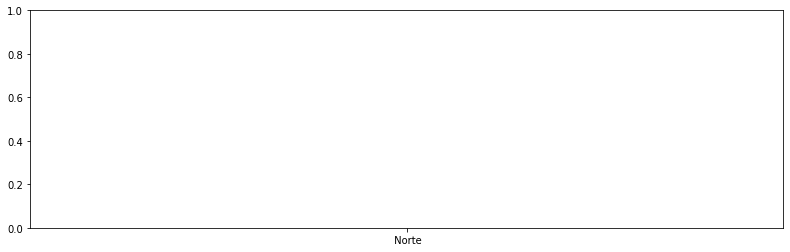

In [ ]:
values = result

plt.figure(figsize=(13.5, 4)) 
plt.bar(region_names, values)
plt.xlabel('Estados')
plt.ylabel('Valor de Média')
plt.title('Mostrando média de formação de docentes inicial por estado 2019')
plt.show()